In [ ]:
import tensorflow as tf #deep learning
from tensorflow.keras import layers, models #model
import matplotlib.pyplot as plt
(x_train, y_train) ,(x_test, y_test)= tf.keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(60000, 28, 28) (60000,) (10000, 28, 28)


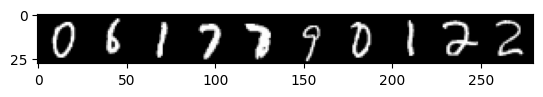

[0, 6, 1, 7, 7, 9, 0, 1, 2, 2]


In [ ]:
print(x_train.shape, y_train.shape, x_test.shape)
indices = range(1000,2000,100) #10 numbers
plt.imshow(tf.concat([x_train[i] for i in indices], axis=1), cmap='gray')
plt.show()
print([int(y_train[i]) for i in indices])
x_train, x_test = x_train/255.0, x_test/255.0 #normalization

In [ ]:
# ANN
model = models.Sequential([
    layers.Flatten(input_shape=(28,28)), #784 inputs
    layers.Dense(64, activation='relu'), #fully connected
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax'),
])
model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#sparse: one-hot encoding categorical_crossentropy:many classes entropy/  metrics:哪些指標觀察

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# training
history = model.fit(x_train, y_train, epochs=20, validation_split=0.1, batch_size=128)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6437 - loss: 10.6028 - val_accuracy: 0.8600 - val_loss: 0.7195
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8649 - loss: 0.6868 - val_accuracy: 0.9038 - val_loss: 0.4461
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9054 - loss: 0.3967 - val_accuracy: 0.9222 - val_loss: 0.3683
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9263 - loss: 0.2886 - val_accuracy: 0.9330 - val_loss: 0.2980
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9397 - loss: 0.2245 - val_accuracy: 0.9432 - val_loss: 0.2451
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9466 - loss: 0.1985 - val_accuracy: 0.9452 - val_loss: 0.2151
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9515 - loss: 0.1712 - val_accuracy: 0.9483 - val_loss: 0.2090
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9586 - loss: 0.1454 - val_accuracy: 0

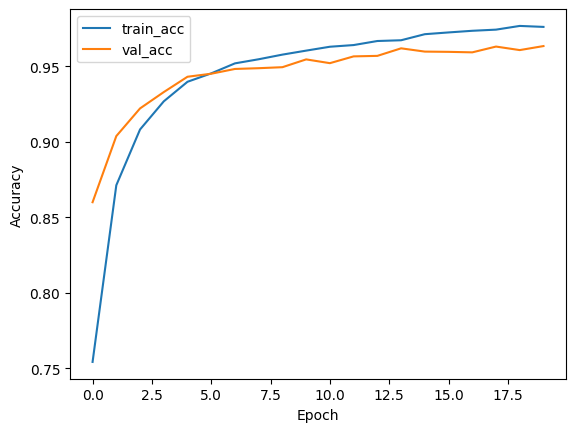

In [ ]:
# 觀察model 表現
plt.plot(history.history['accuracy'], label = 'train_acc') # 一個一個train 平均
plt.plot(history.history['val_accuracy'], label = 'val_acc') # train 後一次測auc
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', test_acc)

Test accuracy: 0.9581000208854675


In [ ]:
# CNN 2d converlution and max pooling
model_CNN = models.Sequential([
    layers.Conv2D(64, 3, activation='relu', input_shape=(28,28,1)), #64個3x3 filter
    layers.MaxPooling2D(2),
    # layers.Conv2D(32, 5, activation='relu'), #32個5x5 filter
    layers.Conv2D(20, 5, activation='relu'),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])
model_CNN.summary()
# 51,232 = (5*5*64 + 1) * 32
model_CNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 9, 9, 20)       │        32,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,854 (210.37 KB)

 Trainable params: 53,854 (210.37 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model_CNN.fit(x_train, y_train, epochs=20, validation_split=0.1, batch_size=128)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8021 - loss: 0.6547 - val_accuracy: 0.9762 - val_loss: 0.0910
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9720 - loss: 0.0940 - val_accuracy: 0.9837 - val_loss: 0.0648
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9804 - loss: 0.0633 - val_accuracy: 0.9838 - val_loss: 0.0553
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9842 - loss: 0.0500 - val_accuracy: 0.9870 - val_loss: 0.0452
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9885 - loss: 0.0387 - val_accuracy: 0.9865 - val_loss: 0.0460
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9914 - loss: 0.0292 - val_accuracy: 0.9870 - val_loss: 0.0408
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9921 - loss: 0.0260 - val_accuracy: 0.9880 - val_loss: 0.0381
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9929 - loss: 0.0213 - val_accuracy: 0

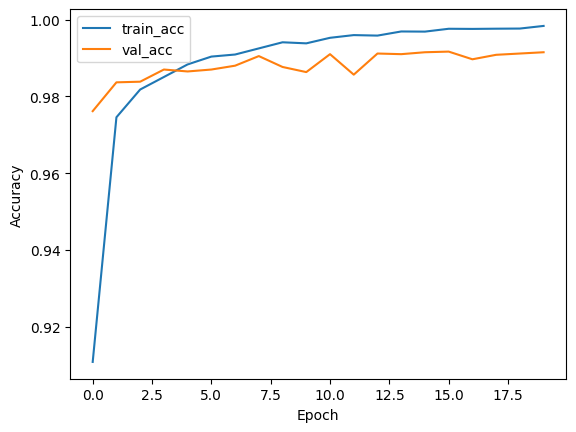

In [ ]:
# 觀察model 表現
plt.plot(history.history['accuracy'], label = 'train_acc') # 一個一個train 平均
plt.plot(history.history['val_accuracy'], label = 'val_acc') # train 後一次測auc
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model_CNN.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', test_acc)

Test accuracy: 0.9911999702453613


In [ ]:
# 比較深
# 比較廣
# CNN

# overfiting

In [ ]:
# RNN (LSTM)

In [ ]:
def build_shallow_fc():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax'),
    ])
    return model

shallow_fc = build_shallow_fc()
shallow_fc.summary()

shallow_fc.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_shallow = shallow_fc.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

test_loss_s, test_acc_s = shallow_fc.evaluate(x_test, y_test, verbose=0)
print("Shallow FC test accuracy:", test_acc_s)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8631 - loss: 0.4952 - val_accuracy: 0.9687 - val_loss: 0.1237
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9630 - loss: 0.1283 - val_accuracy: 0.9765 - val_loss: 0.0847
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9778 - loss: 0.0777 - val_accuracy: 0.9762 - val_loss: 0.0772
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9860 - loss: 0.0521 - val_accuracy: 0.9768 - val_loss: 0.0767
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9887 - loss: 0.0389 - val_accuracy: 0.9803 - val_loss: 0.0683
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9920 - loss: 0.0300 - val_accuracy: 0.9792 - val_loss: 0.0689
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9960 - loss: 0.0190 - val_accuracy: 0.9820 - val_loss: 0.0600
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9964 - loss: 0.0167 - val_accuracy: 0.

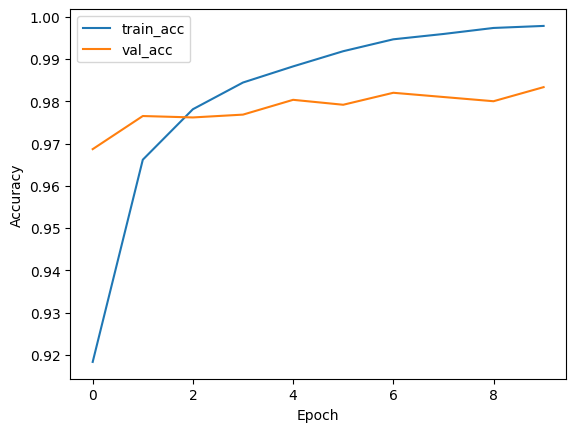

In [ ]:
# 觀察model 表現
plt.plot(history_shallow.history['accuracy'], label = 'train_acc') # 一個一個train 平均
plt.plot(history_shallow.history['val_accuracy'], label = 'val_acc') # train 後一次測auc
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
def build_deep_fc():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(256, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax'),
    ])
    return model

deep_fc = build_deep_fc()
deep_fc.summary()

deep_fc.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_deep = deep_fc.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

test_loss_d, test_acc_d = deep_fc.evaluate(x_test, y_test, verbose=0)
print("Deep FC test accuracy:", test_acc_d)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 300,938 (1.15 MB)

 Trainable params: 300,938 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8614 - loss: 0.4982 - val_accuracy: 0.9688 - val_loss: 0.1051
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9688 - loss: 0.1006 - val_accuracy: 0.9718 - val_loss: 0.0836
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9801 - loss: 0.0648 - val_accuracy: 0.9748 - val_loss: 0.0871
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9844 - loss: 0.0461 - val_accuracy: 0.9780 - val_loss: 0.0773
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9900 - loss: 0.0313 - val_accuracy: 0.9772 - val_loss: 0.0823
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9912 - loss: 0.0271 - val_accuracy: 0.9795 - val_loss: 0.0754
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9924 - loss: 0.0228 - val_accuracy: 0.9783 - val_loss: 0.0789
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9933 - loss: 0.0212 - val_accuracy: 0.

(60000, 28, 28) (60000,) (10000, 28, 28)


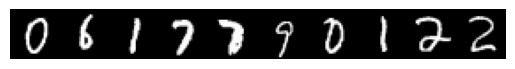

[0, 6, 1, 7, 7, 9, 0, 1, 2, 2]

=== Overfitting Model Summary ===


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 798,474 (3.05 MB)

 Trainable params: 798,474 (3.05 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.5809 - loss: 1.3373 - val_accuracy: 0.8475 - val_loss: 0.4183
Epoch 2/80
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9091 - loss: 0.3093 - val_accuracy: 0.8650 - val_loss: 0.4286
Epoch 3/80
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9503 - loss: 0.1751 - val_accuracy: 0.9150 - val_loss: 0.2641
Epoch 4/80
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9747 - loss: 0.0873 - val_accuracy: 0.9325 - val_loss: 0.2467
Epoch 5/80
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9862 - loss: 0.0466 - val_accuracy: 0.9350 - val_loss: 0.2123
Epoch 6/80
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9896 - loss: 0.0348 - val_accuracy: 0.9325 - val_loss: 0.2540
Epoch 7/80
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9944 - loss: 0.0247 - val_accuracy: 0.9500 - val_loss: 0.2393
Epoch 8/80
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9849 - loss: 0.0509 - val_accuracy: 0.9225 - val_loss

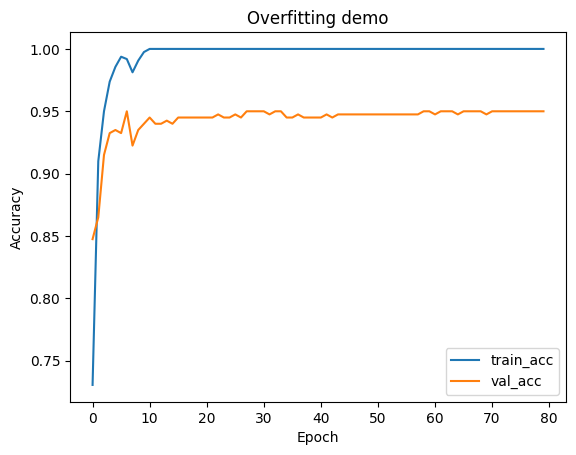

Overfitting model - Test accuracy: 0.9222000241279602

=== Shallow FC Model Summary ===


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 68)             │        53,380 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,070 (211.21 KB)

 Trainable params: 54,070 (211.21 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8042 - loss: 0.7344 - val_accuracy: 0.9455 - val_loss: 0.2023
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9336 - loss: 0.2341 - val_accuracy: 0.9563 - val_loss: 0.1576
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9481 - loss: 0.1777 - val_accuracy: 0.9615 - val_loss: 0.1365
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9577 - loss: 0.1429 - val_accuracy: 0.9655 - val_loss: 0.1223
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9657 - loss: 0.1175 - val_accuracy: 0.9682 - val_loss: 0.1060
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9711 - loss: 0.1009 - val_accuracy: 0.9703 - val_loss: 0.0989
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9758 - loss: 0.0867 - val_accuracy: 0.9698 - val_loss: 0.0978
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9776 - loss: 0.0767 - val_accuracy: 0.

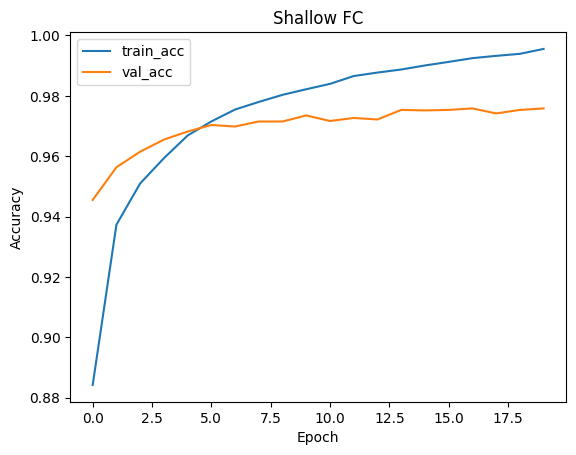

Shallow FC - Test accuracy: 0.9732000231742859

=== Deep FC Model Summary ===


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7617 - loss: 0.8139 - val_accuracy: 0.9477 - val_loss: 0.1844
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9400 - loss: 0.2118 - val_accuracy: 0.9608 - val_loss: 0.1379
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9538 - loss: 0.1550 - val_accuracy: 0.9693 - val_loss: 0.1128
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9657 - loss: 0.1187 - val_accuracy: 0.9670 - val_loss: 0.1045
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9683 - loss: 0.1047 - val_accuracy: 0.9705 - val_loss: 0.0957
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9747 - loss: 0.0842 - val_accuracy: 0.9713 - val_loss: 0.0935
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9782 - loss: 0.0719 - val_accuracy: 0.9737 - val_loss: 0.0852
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9817 - loss: 0.0636 - val_accuracy: 0.

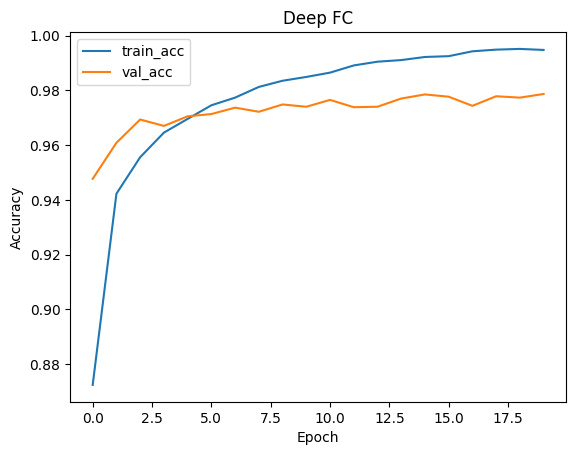

Deep FC - Test accuracy: 0.9742000102996826

=== CNN Model Summary ===


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 9, 9, 20)       │        32,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,854 (210.37 KB)

 Trainable params: 53,854 (210.37 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8145 - loss: 0.6297 - val_accuracy: 0.9737 - val_loss: 0.0869
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9746 - loss: 0.0872 - val_accuracy: 0.9825 - val_loss: 0.0590
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9826 - loss: 0.0591 - val_accuracy: 0.9847 - val_loss: 0.0528
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9864 - loss: 0.0437 - val_accuracy: 0.9868 - val_loss: 0.0455
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9878 - loss: 0.0402 - val_accuracy: 0.9890 - val_loss: 0.0406
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9910 - loss: 0.0282 - val_accuracy: 0.9883 - val_loss: 0.0431
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9921 - loss: 0.0268 - val_accuracy: 0.9893 - val_loss: 0.0381
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9929 - loss: 0.0218 - val_accuracy: 0

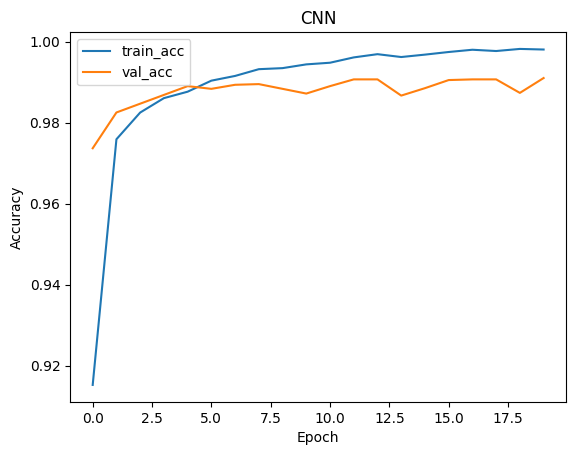

CNN - Test accuracy: 0.9904999732971191

=== Test Accuracy Comparison ===
Shallow FC: 0.9732
Deep    FC: 0.9742
CNN        0.9905


In [ ]:
import tensorflow as tf # deep learning
from tensorflow.keras import layers, models # model
import matplotlib.pyplot as plt

# =========================
# 0. 讀取與初步觀察資料
# =========================
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape, y_train.shape, x_test.shape)
# (60000, 28, 28) (60000,) (10000, 28, 28)

# 顯示幾個 sample
indices = range(1000, 2000, 100)  # 10 numbers
plt.imshow(tf.concat([x_train[i] for i in indices], axis=1), cmap='gray')
plt.axis('off')
plt.show()
print([int(y_train[i]) for i in indices])

# 正規化到 [0,1]
x_train = x_train / 255.0
x_test  = x_test  / 255.0

# CNN 需要多一個 channel 維度：(N, 28, 28, 1)
x_train_cnn = x_train[..., tf.newaxis]
x_test_cnn  = x_test[..., tf.newaxis]

# ============================================================
# (1) Overfitting demo：刻意製造 overfitting 的 ANN model
# ============================================================

# ── 想法：用很少的訓練資料 + 大 model + 很多 epoch，且不加正則化 ──
x_train_small = x_train[:2000]   # 只拿前 2000 筆
y_train_small = y_train[:2000]

model_overfit = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

print("\n=== Overfitting Model Summary ===")
model_overfit.summary()

model_overfit.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_overfit = model_overfit.fit(
    x_train_small, y_train_small,
    epochs=80,             # 很多 epoch
    batch_size=32,         # 小 batch
    validation_split=0.2,  # 2000 -> 1600 train / 400 val
    verbose=1
)

# 畫出 overfitting 的現象
plt.figure()
plt.plot(history_overfit.history['accuracy'], label='train_acc')
plt.plot(history_overfit.history['val_accuracy'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Overfitting demo')
plt.legend()
plt.show()

test_loss_of, test_acc_of = model_overfit.evaluate(x_test, y_test, verbose=0)
print('Overfitting model - Test accuracy:', test_acc_of)

# 說明：
# - 你會看到 train_acc 接近 1.0, 但 val_acc 先上升後掉下來
# - val_loss 也會先下降再上升，代表模型把 1600 筆 train data「背起來」，對新的資料反而變差


# ============================================================
# (2) 三種 model：Shallow FC / Deep FC / CNN（參數量相近）
# ============================================================

# 目標：三個 model 的參數量都差不多在 5 萬多個參數
# - CNN: 約 5.3 萬參數（依目前設計）
# - Deep FC: 用你原本的 ANN (64 -> 32) 當 deep 版
# - Shallow FC: 單一 hidden layer，units 選 68，讓參數 ~ 5.4 萬

# -------------------------
# 2-1. Shallow Fully-connected
# -------------------------

def build_shallow_fc():
    # hidden units = 68 -> 參數約 54,070
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(68, activation='relu'),
        layers.Dense(10, activation='softmax'),
    ])
    return model

model_shallow = build_shallow_fc()
print("\n=== Shallow FC Model Summary ===")
model_shallow.summary()

model_shallow.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_shallow = model_shallow.fit(
    x_train, y_train,
    epochs=20,
    validation_split=0.1,
    batch_size=128,
    verbose=1
)

plt.figure()
plt.plot(history_shallow.history['accuracy'], label='train_acc')
plt.plot(history_shallow.history['val_accuracy'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Shallow FC')
plt.legend()
plt.show()

test_loss_s, test_acc_s = model_shallow.evaluate(x_test, y_test, verbose=0)
print('Shallow FC - Test accuracy:', test_acc_s)


# -------------------------
# 2-2. Deep Fully-connected（用你原本的 ANN）
# -------------------------

model_deep = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # 784 inputs
    layers.Dense(64, activation='relu'),   # fully connected
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

print("\n=== Deep FC Model Summary ===")
model_deep.summary()
# 參數總數大約 52,650, 跟 CNN (~53k) 非常接近

model_deep.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_deep = model_deep.fit(
    x_train, y_train,
    epochs=20,
    validation_split=0.1,
    batch_size=128,
    verbose=1
)

plt.figure()
plt.plot(history_deep.history['accuracy'], label='train_acc')
plt.plot(history_deep.history['val_accuracy'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Deep FC')
plt.legend()
plt.show()

test_loss_d, test_acc_d = model_deep.evaluate(x_test, y_test, verbose=0)
print('Deep FC - Test accuracy:', test_acc_d)


# -------------------------
# 2-3. CNN（2D convolution + max pooling）
# -------------------------

model_cnn = models.Sequential([
    layers.Conv2D(64, 3, activation='relu', input_shape=(28, 28, 1)),  # 64 個 3x3 filter
    layers.MaxPooling2D(2),
    # 原本註解中的 32 個 5x5 filter 改成 20 個 5x5 filter
    layers.Conv2D(20, 5, activation='relu'),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])
print("\n=== CNN Model Summary ===")
model_cnn.summary()
# 粗估參數約 53,854，和上面兩個 FC model 在同一個量級

model_cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_cnn = model_cnn.fit(
    x_train_cnn, y_train,
    epochs=20,
    validation_split=0.1,
    batch_size=128,
    verbose=1
)

plt.figure()
plt.plot(history_cnn.history['accuracy'], label='train_acc')
plt.plot(history_cnn.history['val_accuracy'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN')
plt.legend()
plt.show()

test_loss_c, test_acc_c = model_cnn.evaluate(x_test_cnn, y_test, verbose=0)
print('CNN - Test accuracy:', test_acc_c)


# -------------------------
# 2-4. 比較三者 performance
# -------------------------
print("\n=== Test Accuracy Comparison ===")
print(f"Shallow FC: {test_acc_s:.4f}")
print(f"Deep    FC: {test_acc_d:.4f}")
print(f"CNN        {test_acc_c:.4f}")
